In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
# import xgboost as xgb
%matplotlib inline

In [30]:
data= pd.read_csv('liver_disease.csv')

In [31]:
data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [32]:
data.shape

(583, 11)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [34]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [35]:
data.Albumin_and_Globulin_Ratio.fillna(data.Albumin_and_Globulin_Ratio.mean(), inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

/var/folders/1x/y786hcj51zz6j2jzjsth_kqh0000gn/T/ipykernel_27774/1159591054.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Albumin_and_Globulin_Ratio.fillna(data.Albumin_and_Globulin_Ratio.mean(), inplace=True)


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [37]:
data['Gender']=data['Gender'].apply(lambda x:1 if x=='Male' else 0)

In [38]:
data['Dataset'] = data['Dataset'].map({2:0,1:1})

<Axes: xlabel='Gender'>

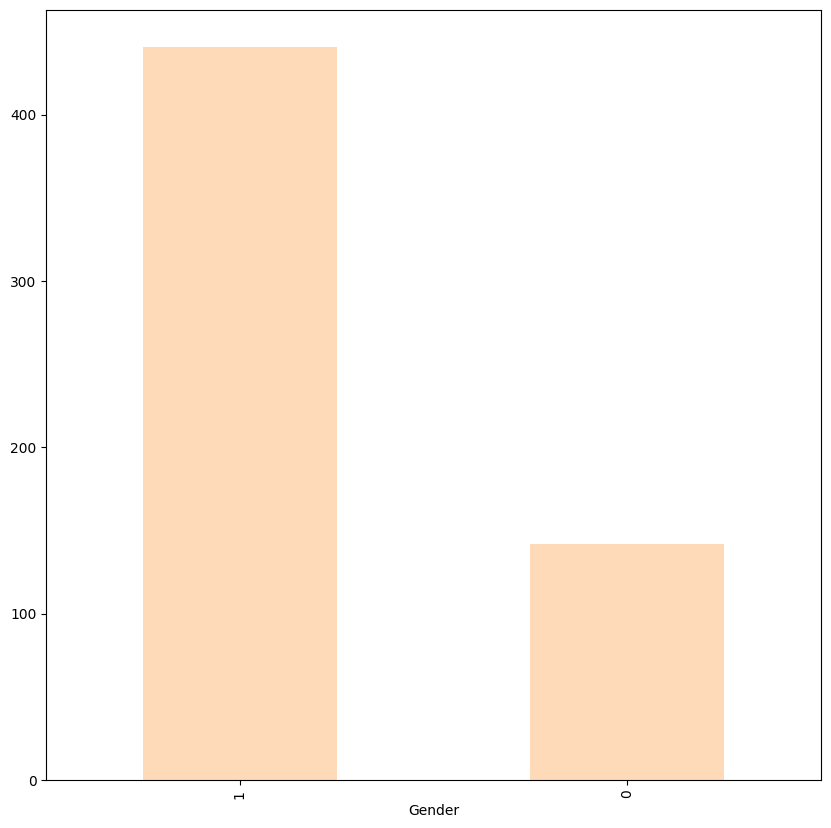

In [39]:
data['Gender'].value_counts().plot.bar(color='peachpuff')

<Axes: xlabel='Dataset'>

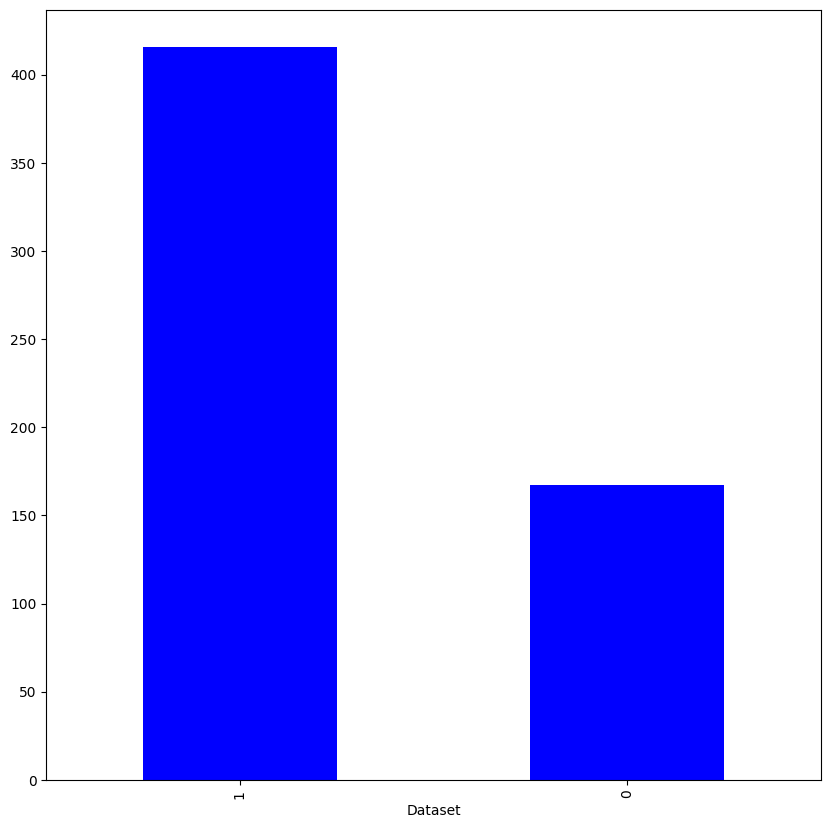

In [40]:
data['Dataset'].value_counts().plot.bar(color='blue')


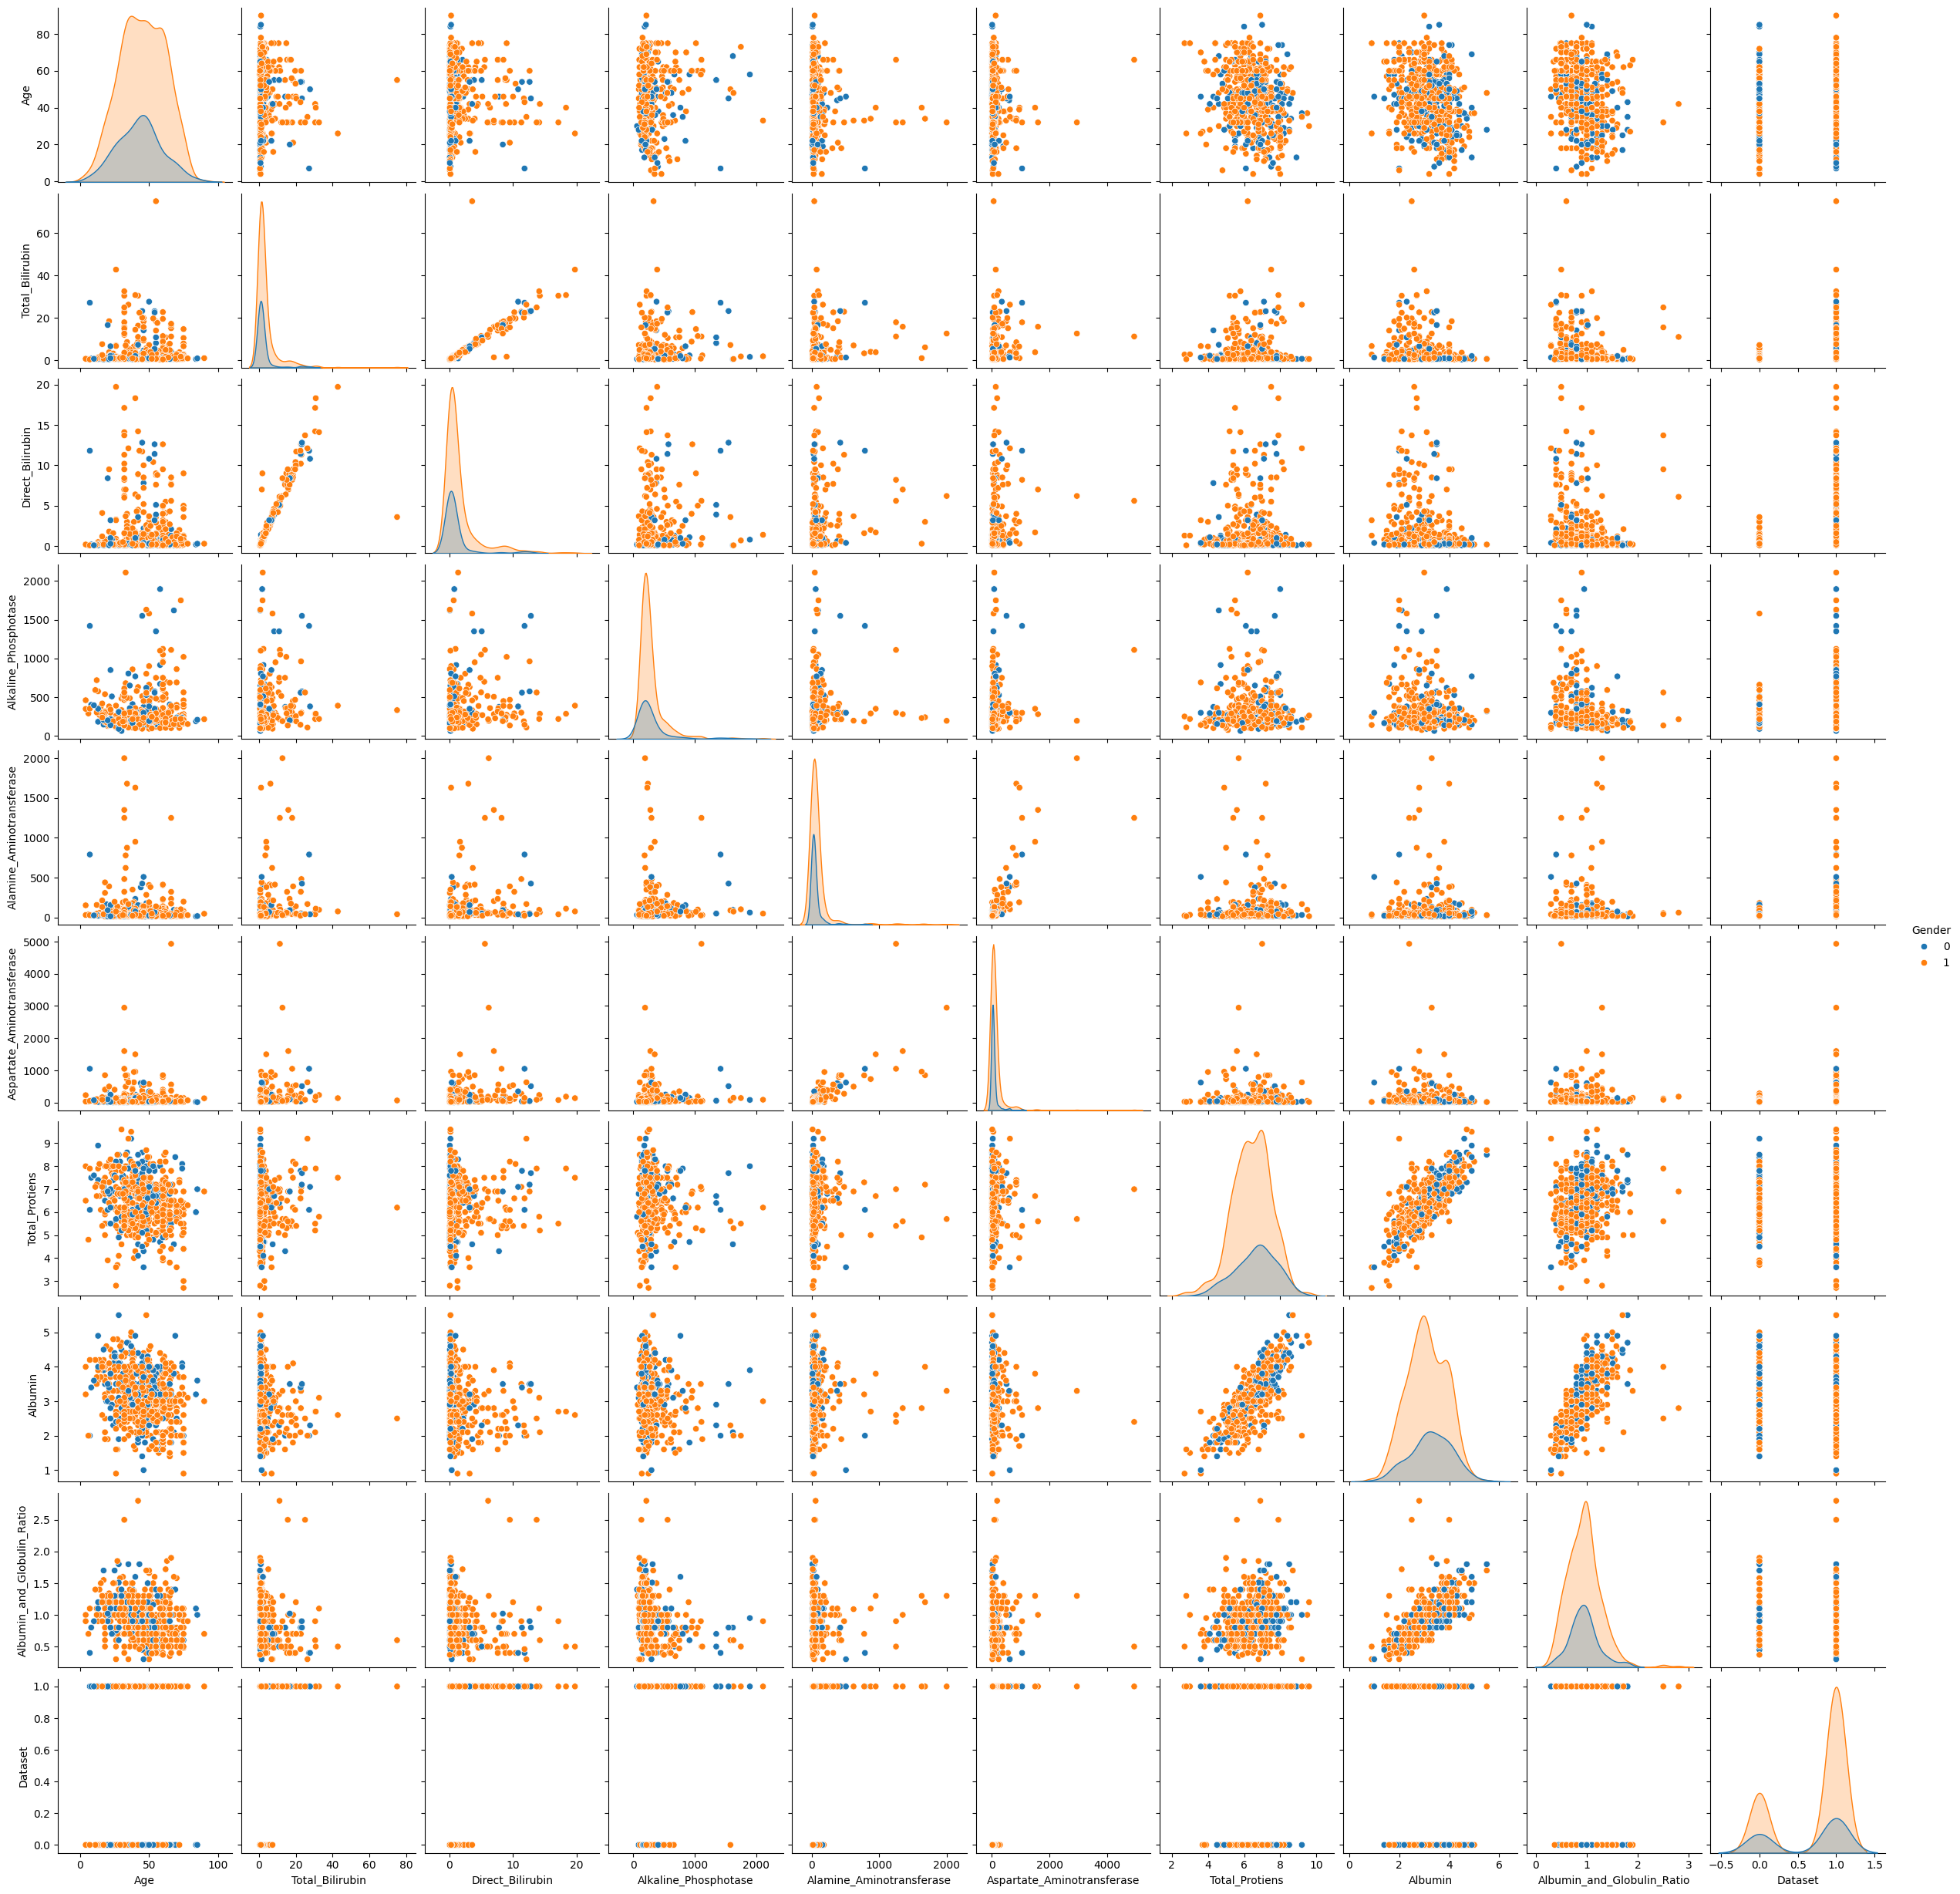

In [41]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(data,hue='Gender')

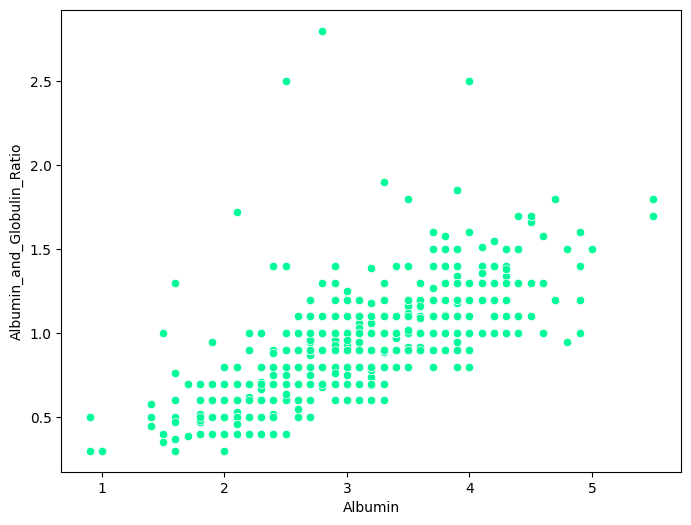

In [44]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=data);
plt.show()

<Axes: xlabel='Gender'>

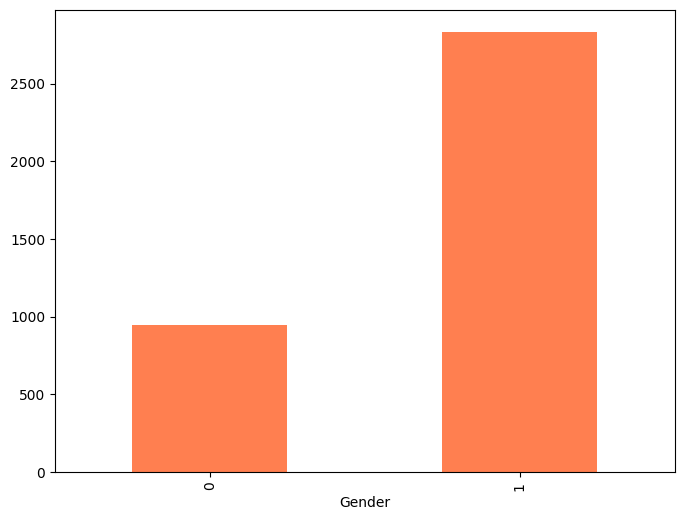

In [48]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

<Axes: xlabel='Gender'>

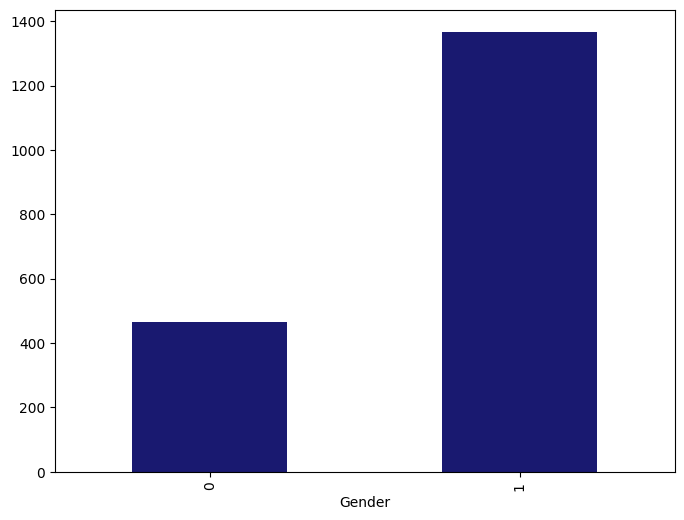

In [49]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

<Axes: xlabel='Gender'>

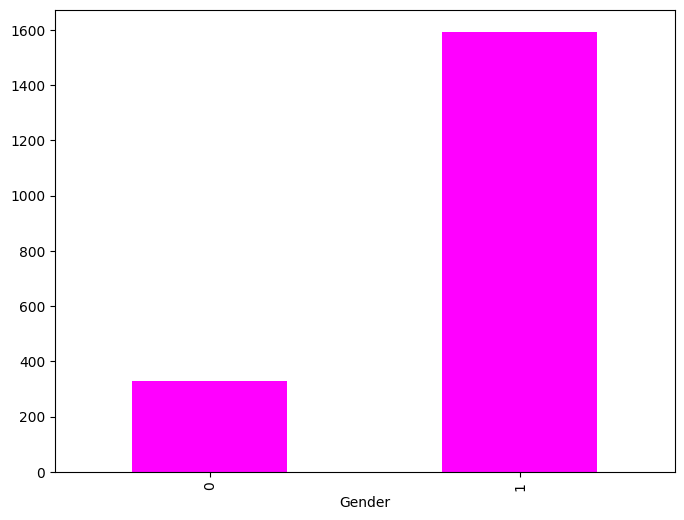

In [50]:
plt.figure(figsize=(8,6))
data.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

<Axes: >

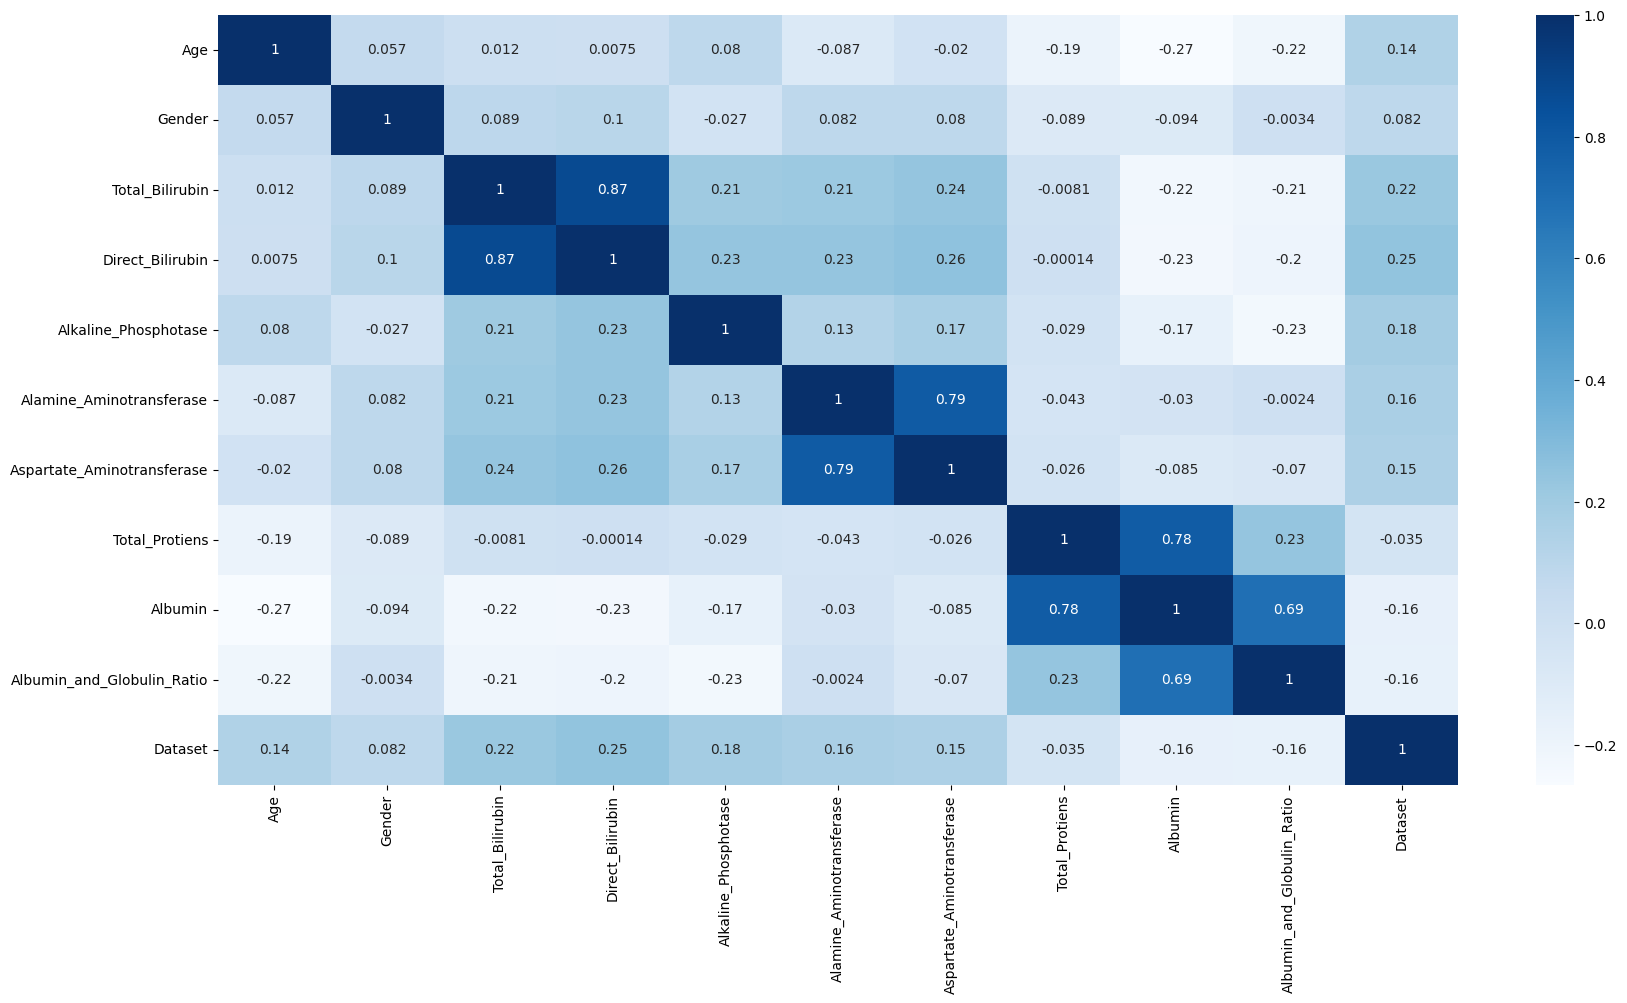

In [19]:
corr=data.corr()
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Blues",annot=True)

In [51]:
X=data.iloc[:,:-1]

y = data['Dataset']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [53]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [54]:
#Determine the number of components to retain
pca = PCA()
pca.fit(X_train_std)
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)
threshold = 0.95
num_components = np.argmax(cumulative_variances >= threshold) + 1
#Applying PCA 
pca = PCA(n_components=num_components)  
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [30]:
model = RandomForestClassifier(n_estimators=100)

# train the model using the training data
model.fit(X_train, y_train)

# test the model using the testing data
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.7692307692307693


In [55]:
model = RandomForestClassifier(n_estimators=100)

# train the model using the training data
model.fit(X_train_pca, y_train)

# test the model using the testing data
accuracy = model.score(X_test_pca, y_test)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.7863247863247863


In [59]:
from sklearn.feature_selection import SelectFromModel #filter method - select from model

In [57]:
X.shape

(583, 10)

In [63]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 20)) 
sel.fit(X,y)
selected_features = sel.transform(X)
sel.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
       False])

In [64]:
selected_features.shape

(583, 5)

In [62]:
model = RandomForestClassifier()

# train the model using the training data
model.fit(X,y)

# test the model using the testing data
accuracy = model.score(X,y)
print(f"Model accuracy: {accuracy}")

Model accuracy: 1.0


In [65]:
import pickle

# Assuming `rf_diabetes_model` is your trained RandomForest model instance
with open('liver_disease.pkl', 'wb') as file:
    pickle.dump(model, file)
